## COVID-19

#### What is Covid-19?

COVID-1

### **A**
##### Objectives and findings from this data

* Fin

##### Importing the data and installing/loading packages.

In [1]:
# 1.1 Packages
install.packages("xts")
install.packages("zoo")
install.packages("tsibble")
install.packages("dplyr")
install.packages("tidyverse")
install.packages("readxl")
install.packages("data.table")
install.packages("frequency")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘lifecycle’, ‘rlang’


Warning message in install.packages("dplyr"):
“installation of package ‘rlang’ had non-zero exit status”
Warning message in install.packages("dplyr"):
“installation of package ‘lifecycle’ had non-zero exit status”
Warning message in install.packages("dplyr"):
“installation of package ‘dplyr’ had non-zero exit status”
Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependency ‘cpp11’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

War

In [2]:
library(zoo)
library(xts)
library(tsibble)
library(dplyr)
library(tidyverse)
library(readxl)
library(data.table)  
library(frequency)
library(lubridate)
library(readr)
library(stringr) 
library(doBy)
library(ggplot2)
library(scales)
library(RColorBrewer)
library(corrplot)
library(doBy)
library(dplyr) 
library(randomForest)
library(gridExtra)
library(DataExplorer)
library(tidyverse)
library(ranger)
library(caret)
library(descr)
library(ggthemes)
library(reshape2)
library(viridis)
library(ggrepel)
library(corrplot)
library(caret)
library(skimr)
library(plotly)
library(data.table)
library(readxl) 



Attaching package: ‘zoo’


The following objects are masked from ‘package:base’:

    as.Date, as.Date.numeric



Attaching package: ‘tsibble’


The following object is masked from ‘package:zoo’:

    index


The following objects are masked from ‘package:base’:

    intersect, setdiff, union



Attaching package: ‘dplyr’


The following objects are masked from ‘package:xts’:

    first, last


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.4     ✔ purrr   0.3.4
✔ tibble  3.1.2     ✔ stringr 1.4.0
✔ tidyr   1.1.3     ✔ forcats 0.5.1
✔ readr   1.4.0     

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::first()  masks xts::first()
✖ dplyr::lag()    masks stats::lag()
✖ dplyr::last()   masks

In [3]:
pacman::p_load(tidyverse, tidymodels) 

In [4]:
list.files(path = '../input/corona-virus-report/')

[1] "country_wise_latest.csv"     "covid_19_clean_complete.csv"
[3] "day_wise.csv"                "full_grouped.csv"           
[5] "usa_county_wise.csv"         "worldometer_data.csv"

In [5]:
'../input/corona-virus-report/country_wise_latest.csv' %>% 
  read.csv  %>% 
  as_tibble() -> country_wise_latest

In [6]:
str(country_wise_latest)

tibble [187 × 15] (S3: tbl_df/tbl/data.frame)
 $ Country.Region        : chr [1:187] "Afghanistan" "Albania" "Algeria" "Andorra" ...
 $ Confirmed             : int [1:187] 36263 4880 27973 907 950 86 167416 37390 15303 20558 ...
 $ Deaths                : int [1:187] 1269 144 1163 52 41 3 3059 711 167 713 ...
 $ Recovered             : int [1:187] 25198 2745 18837 803 242 65 72575 26665 9311 18246 ...
 $ Active                : int [1:187] 9796 1991 7973 52 667 18 91782 10014 5825 1599 ...
 $ New.cases             : int [1:187] 106 117 616 10 18 4 4890 73 368 86 ...
 $ New.deaths            : int [1:187] 10 6 8 0 1 0 120 6 6 1 ...
 $ New.recovered         : int [1:187] 18 63 749 0 0 5 2057 187 137 37 ...
 $ Deaths...100.Cases    : num [1:187] 3.5 2.95 4.16 5.73 4.32 3.49 1.83 1.9 1.09 3.47 ...
 $ Recovered...100.Cases : num [1:187] 69.5 56.2 67.3 88.5 25.5 ...
 $ Deaths...100.Recovered: num [1:187] 5.04 5.25 6.17 6.48 16.94 ...
 $ Confirmed.last.week   : int [1:187] 35526 4171 23691 88

In [7]:

'../input/corona-virus-report/full_grouped.csv' %>% 
  read.csv  %>% 
  as_tibble() -> full_grouped

In [8]:
str(full_grouped)

tibble [35,156 × 10] (S3: tbl_df/tbl/data.frame)
 $ Date          : chr [1:35156] "2020-01-22" "2020-01-22" "2020-01-22" "2020-01-22" ...
 $ Country.Region: chr [1:35156] "Afghanistan" "Albania" "Algeria" "Andorra" ...
 $ Confirmed     : int [1:35156] 0 0 0 0 0 0 0 0 0 0 ...
 $ Deaths        : int [1:35156] 0 0 0 0 0 0 0 0 0 0 ...
 $ Recovered     : int [1:35156] 0 0 0 0 0 0 0 0 0 0 ...
 $ Active        : int [1:35156] 0 0 0 0 0 0 0 0 0 0 ...
 $ New.cases     : int [1:35156] 0 0 0 0 0 0 0 0 0 0 ...
 $ New.deaths    : int [1:35156] 0 0 0 0 0 0 0 0 0 0 ...
 $ New.recovered : int [1:35156] 0 0 0 0 0 0 0 0 0 0 ...
 $ WHO.Region    : chr [1:35156] "Eastern Mediterranean" "Europe" "Africa" "Europe" ...


In [9]:
freq(full_grouped$Country.Region, plot=F) 
rownames(full_grouped)

,Frequency,Percent
Afghanistan,188,0.5347594
Albania,188,0.5347594
Algeria,188,0.5347594
Andorra,188,0.5347594
Angola,188,0.5347594
Antigua and Barbuda,188,0.5347594
Argentina,188,0.5347594
Armenia,188,0.5347594
Australia,188,0.5347594
Austria,188,0.5347594


[1] "1"     "2"     "3"     "4"     "5"     "6"     "7"     "8"     "9"    
   [10] "10"    "11"    "12"    "13"    "14"    "15"    "16"    "17"    "18"   
   [19] "19"    "20"    "21"    "22"    "23"    "24"    "25"    "26"    "27"   
   [28] "28"    "29"    "30"    "31"    "32"    "33"    "34"    "35"    "36"   
   [37] "37"    "38"    "39"    "40"    "41"    "42"    "43"    "44"    "45"   
   [46] "46"    "47"    "48"    "49"    "50"    "51"    "52"    "53"    "54"   
   [55] "55"    "56"    "57"    "58"    "59"    "60"    "61"    "62"    "63"   
   [64] "64"    "65"    "66"    "67"    "68"    "69"    "70"    "71"    "72"   
   [73] "73"    "74"    "75"    "76"    "77"    "78"    "79"    "80"    "81"   
   [82] "82"    "83"    "84"    "85"    "86"    "87"    "88"    "89"    "90"   
   [91] "91"    "92"    "93"    "94"    "95"    "96"    "97"    "98"    "99"   
  [100] "100"   "101"   "102"   "103"   "104"   "105"   "106"   "107"   "108"  
  [109] "109"   "110"   "111"   "112"   "113"   "114"   "115"   "116"   "117"  
  [118] "118"   "119"   "120"   "121"   "122"   "123"   "124"   "125"   "126"  
  [127] "127"   "128"   "129"   "130"   "131"   "132"   "133"   "134"   "135"  
  [136] "136"   "137"   "138"   "139"   "140"   "141"   "142"   "143"   "144"  
  [145] "145"   "146"   "147"   "148"   "149"   "150"   "151"   "152"   "153"  
  [154] "154"   "155"   "156"   "157"   "158"   "159"   "160"   "161"   "162"  
  [163] "163"   "164"   "165"   "166"   "167"   "168"   "169"   "170"   "171"  
  [172] "172"   "173"   "174"   "175"   "176"   "177"   "178"   "179"   "180"  
  [181] "181"   "182"   "183"   "184"   "185"   "186"   "187"   "188"   "189"  
  [190] "190"   "191"   "192"   "193"   "194"   "195"   "196"   "197"   "198"  
  [199] "199"   "200"   "201"   "202"   "203"   "204"   "205"   "206"   "207"  
  [208] "208"   "209"   "210"   "211"   "212"   "213"   "214"   "215"   "216"  
  [217] "217"   "218"   "219"   "220"   "221"   "222"   "223"   "224"   "225"  
  [226] "226"   "227"   "228"   "229"   "230"   "231"   "232"   "233"   "234"  
  [235] "235"   "236"   "237"   "238"   "239"   "240"   "241"   "242"   "243"  
  [244] "244"   "245"   "246"   "247"   "248"   "249"   "250"   "251"   "252"  
  [253] "253"   "254"   "255"   "256"   "257"   "258"   "259"   "260"   "261"  
  [262] "262"   "263"   "264"   "265"   "266"   "267"   "268"   "269"   "270"  
  [271] "271"   "272"   "273"   "274"   "275"   "276"   "277"   "278"   "279"  
  [280] "280"   "281"   "282"   "283"   "284"   "285"   "286"   "287"   "288"  
  [289] "289"   "290"   "291"   "292"   "293"   "294"   "295"   "296"   "297"  
  [298] "298"   "299"   "300"   "301"   "302"   "303"   "304"   "305"   "306"  
  [307] "307"   "308"   "309"   "310"   "311"   "312"   "313"   "314"   "315"  
  [316] "316"   "317"   "318"   "319"   "320"   "321"   "322"   "323"   "324"  
  [325] "325"   "326"   "327"   "328"   "329"   "330"   "331"   "332"   "333"  
  [334] "334"   "335"   "336"   "337"   "338"   "339"   "340"   "341"   "342"  
  [343] "343"   "344"   "345"   "346"   "347"   "348"   "349"   "350"   "351"  
  [352] "352"   "353"   "354"   "355"   "356"   "357"   "358"   "359"   "360"  
  [361] "361"   "362"   "363"   "364"   "365"   "366"   "367"   "368"   "369"  
  [370] "370"   "371"   "372"   "373"   "374"   "375"   "376"   "377"   "378"  
  [379] "379"   "380"   "381"   "382"   "383"   "384"   "385"   "386"   "387"  
  [388] "388"   "389"   "390"   "391"   "392"   "393"   "394"   "395"   "396"  
  [397] "397"   "398"   "399"   "400"   "401"   "402"   "403"   "404"   "405"  
  [406] "406"   "407"   "408"   "409"   "410"   "411"   "412"   "413"   "414"  
  [415] "415"   "416"   "417"   "418"   "419"   "420"   "421"   "422"   "423"  
  [424] "424"   "425"   "426"   "427"   "428"   "429"   "430"   "431"   "432"  
  [433] "433"   "434"   "435"   "436"   "437"   "438"   "439"   "440"   "441"  
  [442] "442"   "443"   "444"   "445"   "446"   "447"   "448"   "449"   "450"  
  [4

In [10]:
full_grouped %>% filter(Country.Region=="South Korea") -> full_grouped_korea

In [11]:
head(full_grouped_korea, 3)


Date,Country.Region,Confirmed,Deaths,Recovered,Active,New.cases,New.deaths,New.recovered,WHO.Region
<chr>,<chr>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<chr>
2020-01-22,South Korea,1,0,0,1,0,0,0,Western Pacific
2020-01-23,South Korea,1,0,0,1,0,0,0,Western Pacific
2020-01-24,South Korea,2,0,0,2,1,0,0,Western Pacific


In [12]:
full_grouped_korea$Date <- as.factor(full_grouped_korea$Date) 
head(full_grouped_korea, 3)

Date,Country.Region,Confirmed,Deaths,Recovered,Active,New.cases,New.deaths,New.recovered,WHO.Region
<fct>,<chr>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<chr>
2020-01-22,South Korea,1,0,0,1,0,0,0,Western Pacific
2020-01-23,South Korea,1,0,0,1,0,0,0,Western Pacific
2020-01-24,South Korea,2,0,0,2,1,0,0,Western Pacific


In [13]:
full_grouped_korea$Date <- as.Date(full_grouped_korea$Date, "%Y-%m-%d") #covid19_south_korea데이터테이블의 Date factor변수의 값 형식이 2020-01-22이기 때문에 날짜변수로 지정할 때는 "%Y-%m-%d"형식을 지정. 
head(full_grouped_korea, 3)

Date,Country.Region,Confirmed,Deaths,Recovered,Active,New.cases,New.deaths,New.recovered,WHO.Region
<date>,<chr>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<chr>
2020-01-22,South Korea,1,0,0,1,0,0,0,Western Pacific
2020-01-23,South Korea,1,0,0,1,0,0,0,Western Pacific
2020-01-24,South Korea,2,0,0,2,1,0,0,Western Pacific


In [14]:
colSums(is.na(full_grouped_korea)) 

Date Country.Region      Confirmed         Deaths      Recovered 
             0              0              0              0              0 
        Active      New.cases     New.deaths  New.recovered     WHO.Region 
             0              0              0              0              0

In [16]:
full_grouped_korea %>% select(-Country.Region, -WHO.Region) ->  full_grouped_korea_1   
head(full_grouped_korea_1, 3)

Date,Confirmed,Deaths,Recovered,Active,New.cases,New.deaths,New.recovered
<date>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
2020-01-22,1,0,0,1,0,0,0
2020-01-23,1,0,0,1,0,0,0
2020-01-24,2,0,0,2,1,0,0


### Declare time series data**


### ****

##### **

In [17]:
full_grouped_korea_1.ts <- ts(full_grouped_korea_1[, 2:8], frequency = 365)
head(full_grouped_korea_1.ts, 5)

Confirmed,Deaths,Recovered,Active,New.cases,New.deaths,New.recovered
1,0,0,1,0,0,0
1,0,0,1,0,0,0
2,0,0,2,1,0,0
2,0,0,2,0,0,0
3,0,0,3,1,0,0


In [19]:
full_grouped_korea_1.xts <- as.xts(full_grouped_korea_1[, 2:8], order.by = full_grouped_korea_1$Date)
head(full_grouped_korea_1.xts)

           Confirmed Deaths Recovered Active New.cases New.deaths New.recovered
2020-01-22         1      0         0      1         0          0             0
2020-01-23         1      0         0      1         0          0             0
2020-01-24         2      0         0      2         1          0             0
2020-01-25         2      0         0      2         0          0             0
2020-01-26         3      0         0      3         1          0             0
2020-01-27         4      0         0      4         1          0             0

In [20]:
full_grouped_korea_1.tsibble <- as_tsibble(full_grouped_korea_1, index = Date)
head(full_grouped_korea_1.tsibble, 5)

Date,Confirmed,Deaths,Recovered,Active,New.cases,New.deaths,New.recovered
<date>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
2020-01-22,1,0,0,1,0,0,0
2020-01-23,1,0,0,1,0,0,0
2020-01-24,2,0,0,2,1,0,0
2020-01-25,2,0,0,2,0,0,0
2020-01-26,3,0,0,3,1,0,0


### **Visualize time series data**
#### A
##### B.

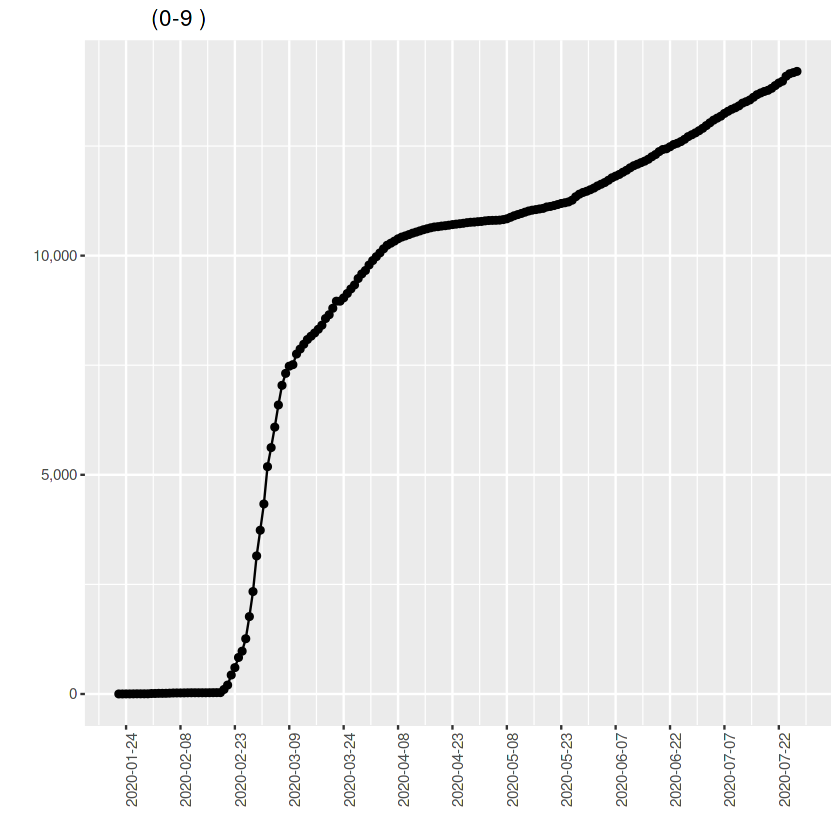

In [21]:
ggplot(data = full_grouped_korea_1, aes(x = Date, y = Confirmed)) + 
  geom_line(aes(group = 1)) +
  geom_point(shape = 'circle') +
  labs(title = '일별 코로나 확진자수(0-9세)', x = '시간', y = '확진자수') +
  scale_y_continuous(labels = scales::number_format(big.mark = ',')) +
  scale_x_date(breaks = '15 day') +
  theme(axis.text.x=element_text(angle=90,hjust=1))


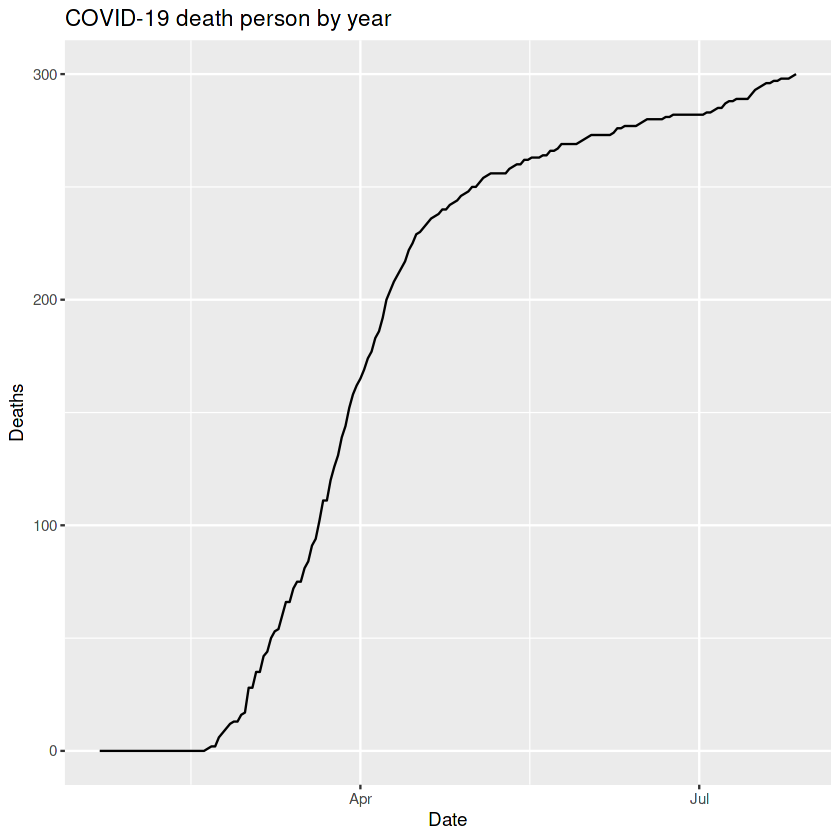

In [23]:
full_grouped_korea_1 %>%
  ggplot(aes(x = Date, y = Deaths)) + 
  geom_line(aes(group = 1)) +
  labs(title = 'COVID-19 death person by year')


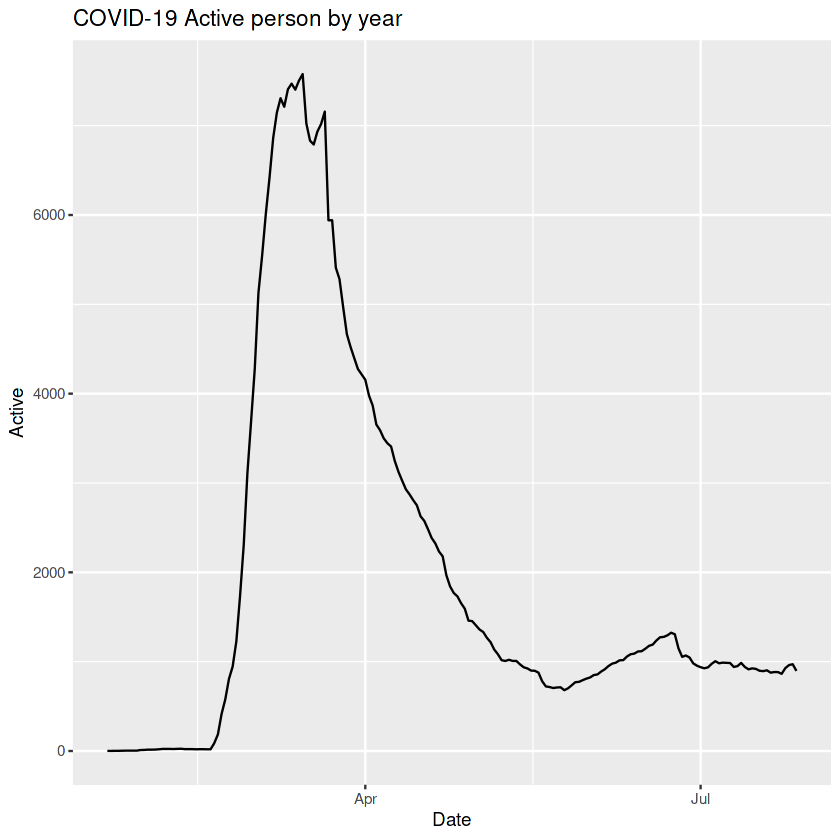

In [24]:
full_grouped_korea_1 %>%
  ggplot(aes(x = Date, y = Active)) + 
  geom_line(aes(group = 1)) +
  labs(title = 'COVID-19 Active person by year')


In [27]:
head(full_grouped_korea_1.ts, 3)

Confirmed,Deaths,Recovered,Active,New.cases,New.deaths,New.recovered
1,0,0,1,0,0,0
1,0,0,1,0,0,0
2,0,0,2,1,0,0


In [32]:
install.packages("forcast")
library(forcast)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Warning message:
“package ‘forcast’ is not available for this version of R

A version of this package for your version of R might be available elsewhere,
see the ideas at
https://cran.r-project.org/doc/manuals/r-patched/R-admin.html#Installing-packages”


ERROR: Error in library(forcast): there is no package called ‘forcast’


In [37]:
autoplot(full_grouped_korea_1.ts[,1], main = 'COVID-19 화진자수', xlab = '날짜', ylab = 'COVID-19 화진자수', series = 'Confirmed', lty = 1, lwd = 1)


ERROR: Error: Objects of type ts not supported by autoplot.


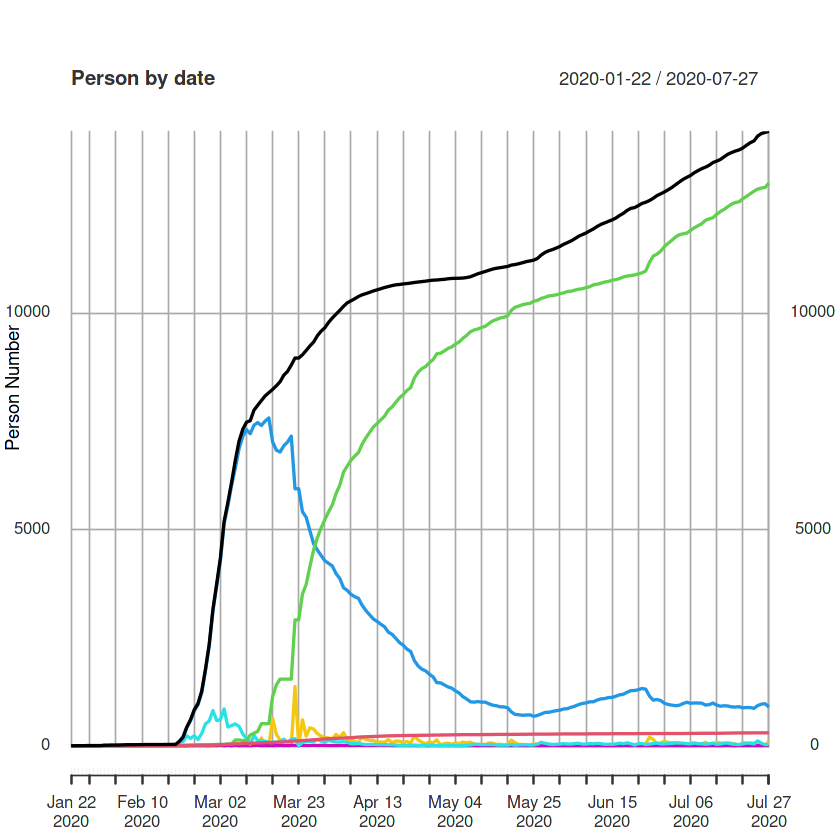

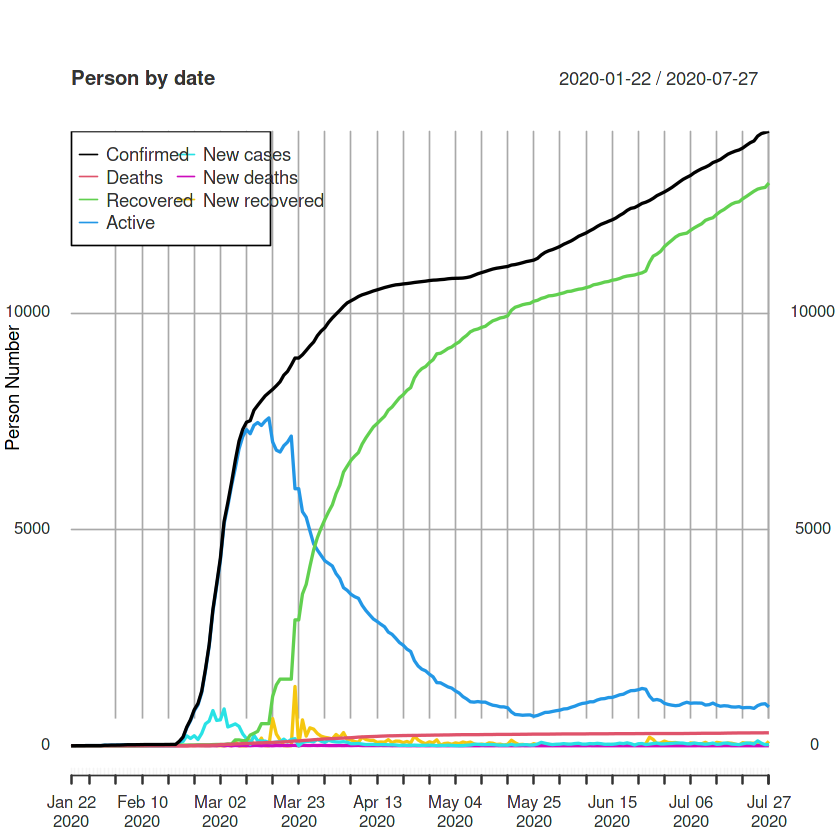

In [31]:
plot.xts(full_grouped_korea_1.xts, main = 'Person by date', xlab = 'date', ylab = 'Person Number')
addLegend('topleft', ncol = 2, legend.names = c('Confirmed', 'Deaths', 'Recovered', 'Active', 'New cases', 'New deaths', 'New recovered'), lty = 1, bg = 'white', bty="o")

In [41]:
head(full_grouped_korea_1, 3)

Date,Confirmed,Deaths,Recovered,Active,New.cases,New.deaths,New.recovered
<date>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
2020-01-22,1,0,0,1,0,0,0
2020-01-23,1,0,0,1,0,0,0
2020-01-24,2,0,0,2,1,0,0


In [42]:
full_grouped_korea_1 %>%
  plot_time_series(.date_var = Date, .value = Confirmed, .smooth = F, .title = '일별 코로나 확진자수(0-9세)', .x_lab = '연월', .y_lab = '확진자수')


ERROR: Error in plot_time_series(., .date_var = Date, .value = Confirmed, .smooth = F, : could not find function "plot_time_series"


In [46]:
full_grouped_korea_1 %>%
  mutate(month = lubridate::month(full_grouped_korea_1$Date))  -> full_grouped_korea_2
head(full_grouped_korea_2)


Date,Confirmed,Deaths,Recovered,Active,New.cases,New.deaths,New.recovered,month
<date>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>
2020-01-22,1,0,0,1,0,0,0,1
2020-01-23,1,0,0,1,0,0,0,1
2020-01-24,2,0,0,2,1,0,0,1
2020-01-25,2,0,0,2,0,0,0,1
2020-01-26,3,0,0,3,1,0,0,1
2020-01-27,4,0,0,4,1,0,0,1


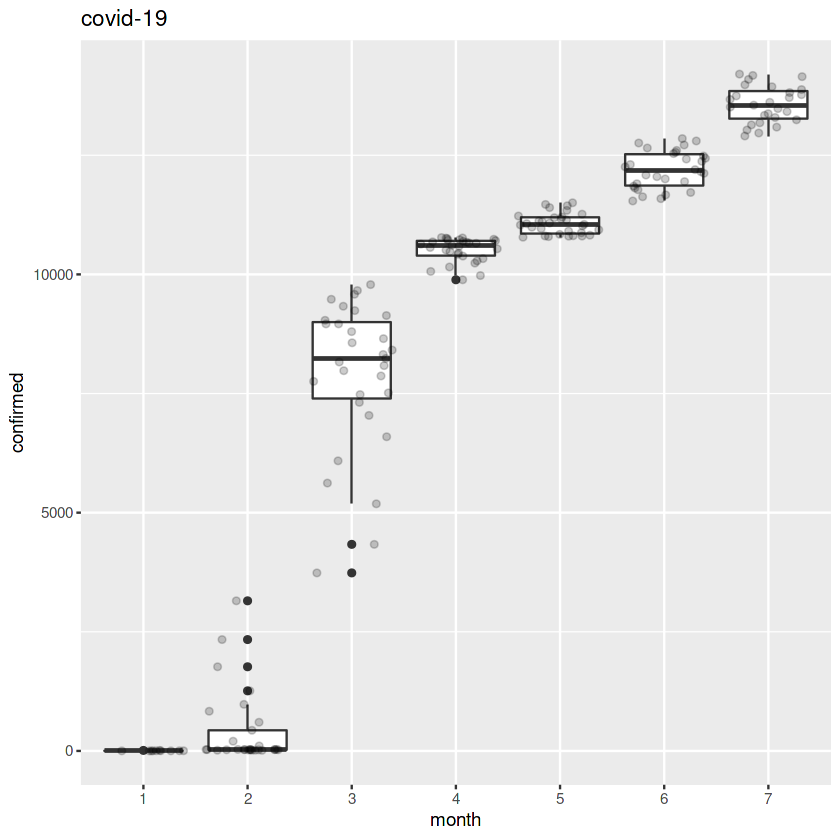

In [49]:
full_grouped_korea_1 %>%
  mutate(month = lubridate::month(full_grouped_korea_1$Date)) %>%
  ggplot(aes(as.factor(month), Confirmed)) +
  geom_boxplot() +
  geom_jitter(alpha = 0.2) +
  labs(title = 'covid-19', x = 'month', y = 'confirmed')


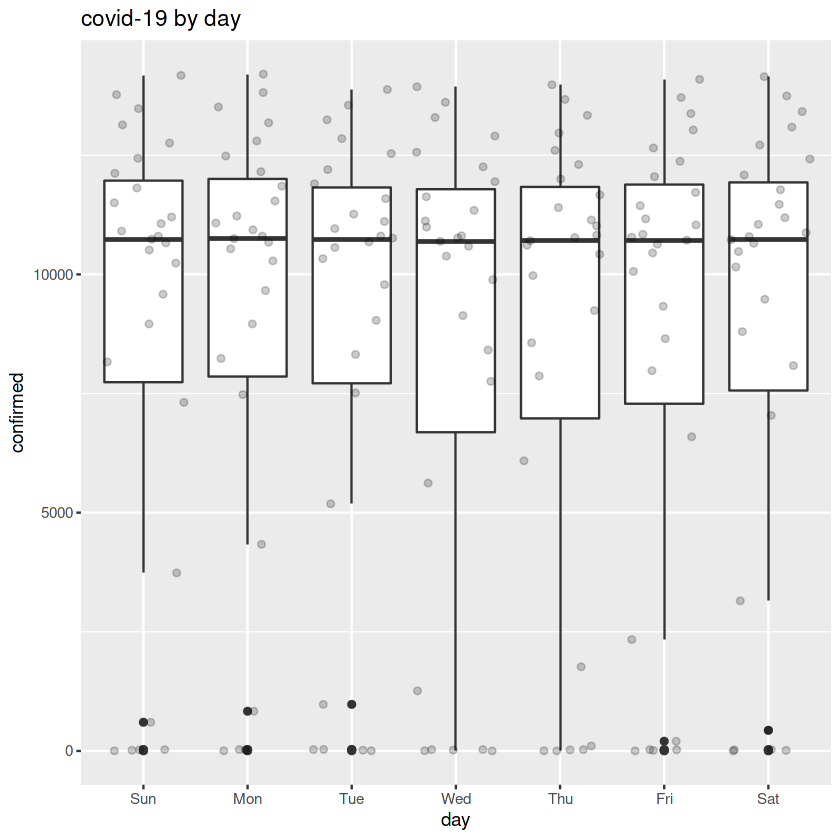

In [50]:
full_grouped_korea_1 %>%
  mutate(wday = lubridate::wday(full_grouped_korea_1 $Date, label = TRUE)) %>%
  ggplot(aes(as.factor(wday), Confirmed)) +
  geom_boxplot() +
  geom_jitter(alpha = 0.2) +
  labs(title = 'covid-19 by day', x = 'day', y = 'confirmed')

##### Based

##### Based on the

#### Regions
##### Basest.